In [85]:
import os
import numpy as np
import glob
import PIL.Image as Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import models
from torchsummary import summary
import torch.optim as optim
from time import time

import matplotlib.pyplot as plt
from IPython.display import clear_output

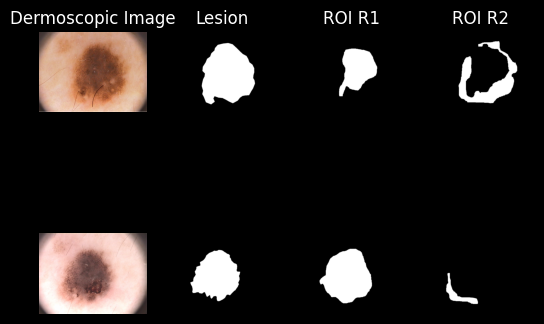

In [86]:
path = '/dtu/datasets1/02514/PH2_Dataset_images/'
fig,ax = plt.subplots(2,4)
ax[0,0].set_title("Dermoscopic Image")
ax[0,1].set_title("Lesion")
ax[0,2].set_title("ROI R1")
ax[0,3].set_title("ROI R2")
for idx,i in enumerate([2,4]):
    im_img_ph = plt.imread(path+f'IMD00{i}/IMD00{i}_Dermoscopic_Image/IMD00{i}.bmp')
    im_lesion = plt.imread(path+f'IMD00{i}/IMD00{i}_lesion/IMD00{i}_lesion.bmp')
    im_roi_R1 = plt.imread(path+f'IMD00{i}/IMD00{i}_roi/IMD00{i}_R1_Label4.bmp')
    im_roi_R2 = plt.imread(path+f'IMD00{i}/IMD00{i}_roi/IMD00{i}_R2_Label3.bmp')

    ax[idx,0].imshow(im_img_ph)
    ax[idx,0].axis('off')
    ax[idx,1].imshow(im_lesion)
    ax[idx,1].axis('off')
    ax[idx,2].imshow(im_roi_R1)
    ax[idx,2].axis('off')
    ax[idx,3].imshow(im_roi_R2)
    ax[idx,3].axis('off')

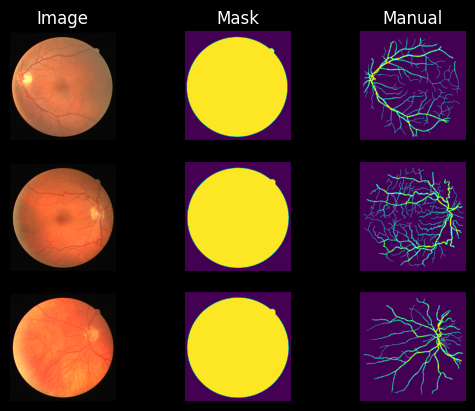

In [87]:
path = '/dtu/datasets1/02514/DRIVE/training'


fig,ax = plt.subplots(3,3)
ax[0,0].set_title("Image")
ax[0,1].set_title("Mask")
ax[0,2].set_title("Manual")
for i in [1,2,3]:
    
    im_mas = plt.imread(path+f'/mask/2{i}_training_mask.gif')
    im_img = plt.imread(path+f'/images/2{i}_training.tif')
    im_man = plt.imread(path+f'/1st_manual/2{i}_manual1.gif')

    ax[i-1,0].imshow(im_img)
    ax[i-1,0].axis('off')
    ax[i-1,1].imshow(im_mas)
    ax[i-1,1].axis('off')
    ax[i-1,2].imshow(im_man)
    ax[i-1,2].axis('off')

In [88]:
list_of_stem = ["IMD207","IMD421","IMD386","IMD436","IMD010","IMD162","IMD369","IMD112","IMD405","IMD137","IMD149","IMD168","IMD207","IMD421","IMD383","IMD155","IMD436","IMD386","IMD182","IMD162","IMD038","IMD010","IMD285","IMD112","IMD369","IMD206","IMD022","IMD137","IMD176","IMD405","IMD242","IMD168","IMD430","IMD149","IMD384","IMD376"]

for name in list_of_stem:
    img = plt.imread('/dtu/datasets1/02514/PH2_Dataset_images/'+name+'/'+name+'_Dermoscopic_Image/'+name+'.bmp')
    plt.imsave('../dl4cv/images/'+name+'.png', img)

FileNotFoundError: [Errno 2] No such file or directory: '../dl4cv/images/IMD207.png'

In [ ]:
list_of_stem = ["35_training","39_training","38_training"]
path = '/dtu/datasets1/02514/DRIVE/training/images/'
for name in list_of_stem:
    fig = plt.imread(path+name+".tif")
    plt.imsave('../dl4cv/images/'+name+'.png', fig)

    

### Projekt 3

In [ ]:
!ls '../../StyleCLIP/generations/'


hair_conditioned_marku		   hair_marku2_weight_02_2  hair_weighted
hair_marku2_condition_weight_02_1  hair_no_condition


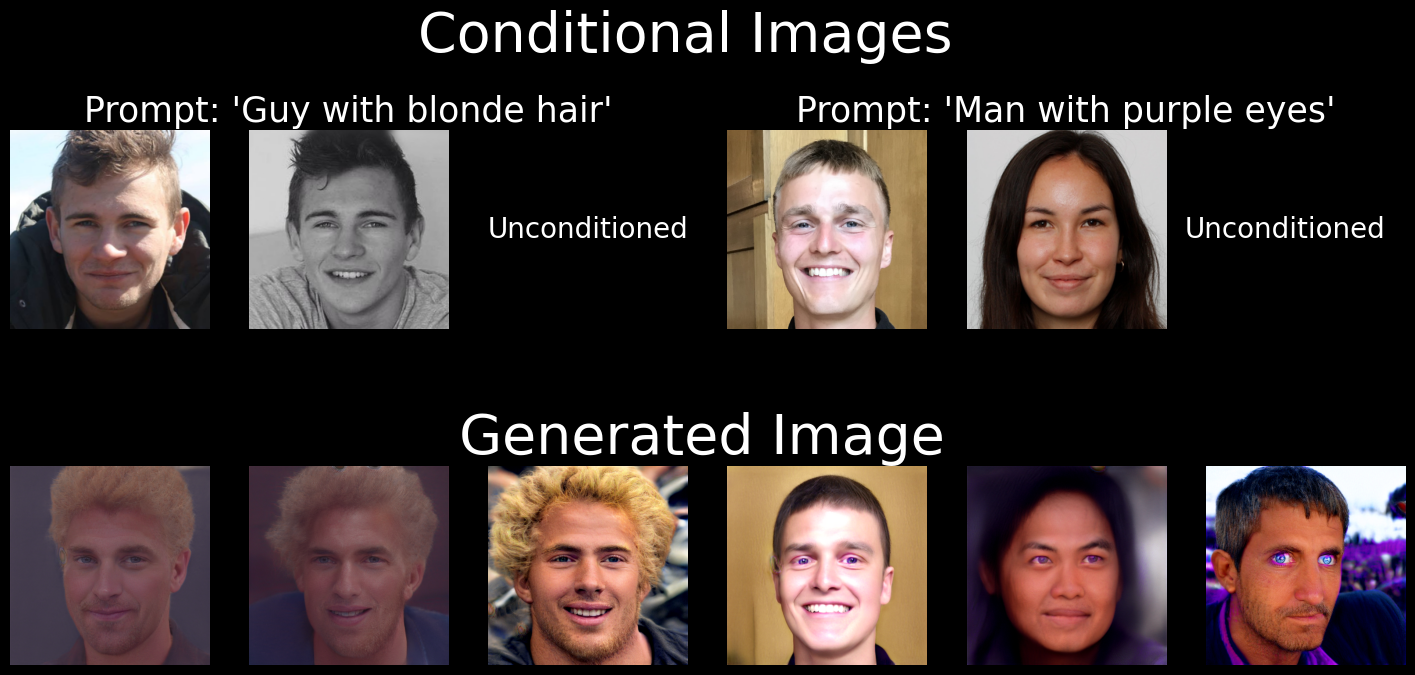

In [108]:
fig,ax = plt.subplots(2,6,figsize=(18,8))
fig.suptitle('Conditional Images',fontsize=40)
img_path = '../../StyleCLIP/generations/'

img_cond2 = plt.imread(img_path+'marku2.png')
img_cond1 = plt.imread(img_path+'marku.png')
img_no_cond = plt.imread(img_path+'hair_no_condition/1100.png')
img_cond_weight = plt.imread(img_path+'hair_marku2_condition_weight_02_1/1100.png')
img_cond_marku1 = plt.imread(img_path+'hair_marku2_weight_02_2/1100.png')
img_gen_stef = plt.imread(img_path+'fig1.png')
img_no_cond_eye = plt.imread(img_path+'fig2.png')
img_stef = plt.imread(img_path+'fig3.png')
img_vic = plt.imread(img_path+'fig_vic.png')
img_vic_gen =plt.imread(img_path+'vic_conditional_eye/4400.png')

ax[0,0].imshow(img_cond2)
ax[0,0].axis('off')

ax[0,1].imshow(img_cond1)
ax[0,1].axis('off')

ax[0,3].imshow(img_stef)
ax[0,1].set_title("Prompt: 'Guy with blonde hair'",fontsize=25)
ax[0,2].axis('off')
ax[0,3].text(-0.7, 0.5, 'Unconditioned',size=20 ,va="center", ha="center",transform=ax[0, 3].transAxes)
ax[0,3].text(2.8, 0.5, 'Unconditioned',size=20 ,va="center", ha="center",transform=ax[0, 3].transAxes)



ax[0,3].axis('off')
ax[0,4].imshow(img_vic)
ax[0,4].axis('off')
ax[0,4].set_title("Prompt: 'Man with purple eyes'",fontsize=25)

ax[0,5].axis('off')

ax[1,1].imshow(img_cond_marku1)
ax[1,1].axis('off')
ax[1,2].set_title("             Generated Image",fontsize=40)
ax[1,0].imshow(img_cond_weight)
ax[1,0].axis('off')
ax[1,3].imshow(img_gen_stef)
ax[1,2].axis('off')
ax[1,2].imshow(img_no_cond)
ax[1,3].axis('off')
ax[1,4].imshow(img_vic_gen)
ax[1,4].axis('off')
ax[1,5].imshow(img_no_cond_eye)
ax[1,5].axis('off')

plt.savefig("../../images/clip.pdf",transparent=True,bbox_inches='tight')

In [109]:
!pwd


/zhome/bf/1/137424/dl4cv/notebooks/markus
